### import packages

In [69]:
!pwd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

/sfs/weka/scratch/syw3ev


### load data

In [70]:
filename="/project/rivanna-stats/all/2024-04/corehours-2024-04-SchoolpartitionJobType-all.csv"#TODO change to the month you want to visualize
data=pd.read_csv(filename)
print("summary of Data")
print(data.info())

summary of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School           198 non-null    object 
 1   partition        198 non-null    object 
 2   JobType          198 non-null    object 
 3   resvcpuraw       198 non-null    float64
 4   reqcpus          198 non-null    int64  
 5   Total CPU hours  198 non-null    float64
 6   Total GPU hours  198 non-null    float64
 7   Wait Time        198 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.5+ KB
None


### Aggregate data

In [ ]:
def aggregate(key):
    agg=data.groupby(key).agg({ 
            'Total CPU hours': 'sum',
            'Total GPU hours': 'sum',
            'Wait Time hours': ['sum', 'mean'],
        }).reset_index()
    agg.columns = [key, 'Total CPU hours', 'Total GPU hours', 'Total Wait Time hours', 'Average Wait Time hours']
    return agg

partition_agg=aggregate('partition')
jobtype_agg=aggregate('JobType')
school_agg=aggregate('School')
# print(partition_agg)
# print(jobtype_agg)
# print(school_agg)

### Bar Chart

In [72]:
def bar_together(data,key):
    data.plot(kind='bar', x=key,y=['Total CPU hours','Total GPU hours','Total Wait Time hours'], figsize=(8,6), title= key+' Aggregate Data')
    plt.ylabel('Hours')
    plt.xticks(rotation=45)
    plt.show()
    
output = widgets.Output()

with output:
    bar_together(partition_agg,'partition')
    bar_together(jobtype_agg,'JobType')
    bar_together(school_agg,'School')

    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1000px', height='400px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

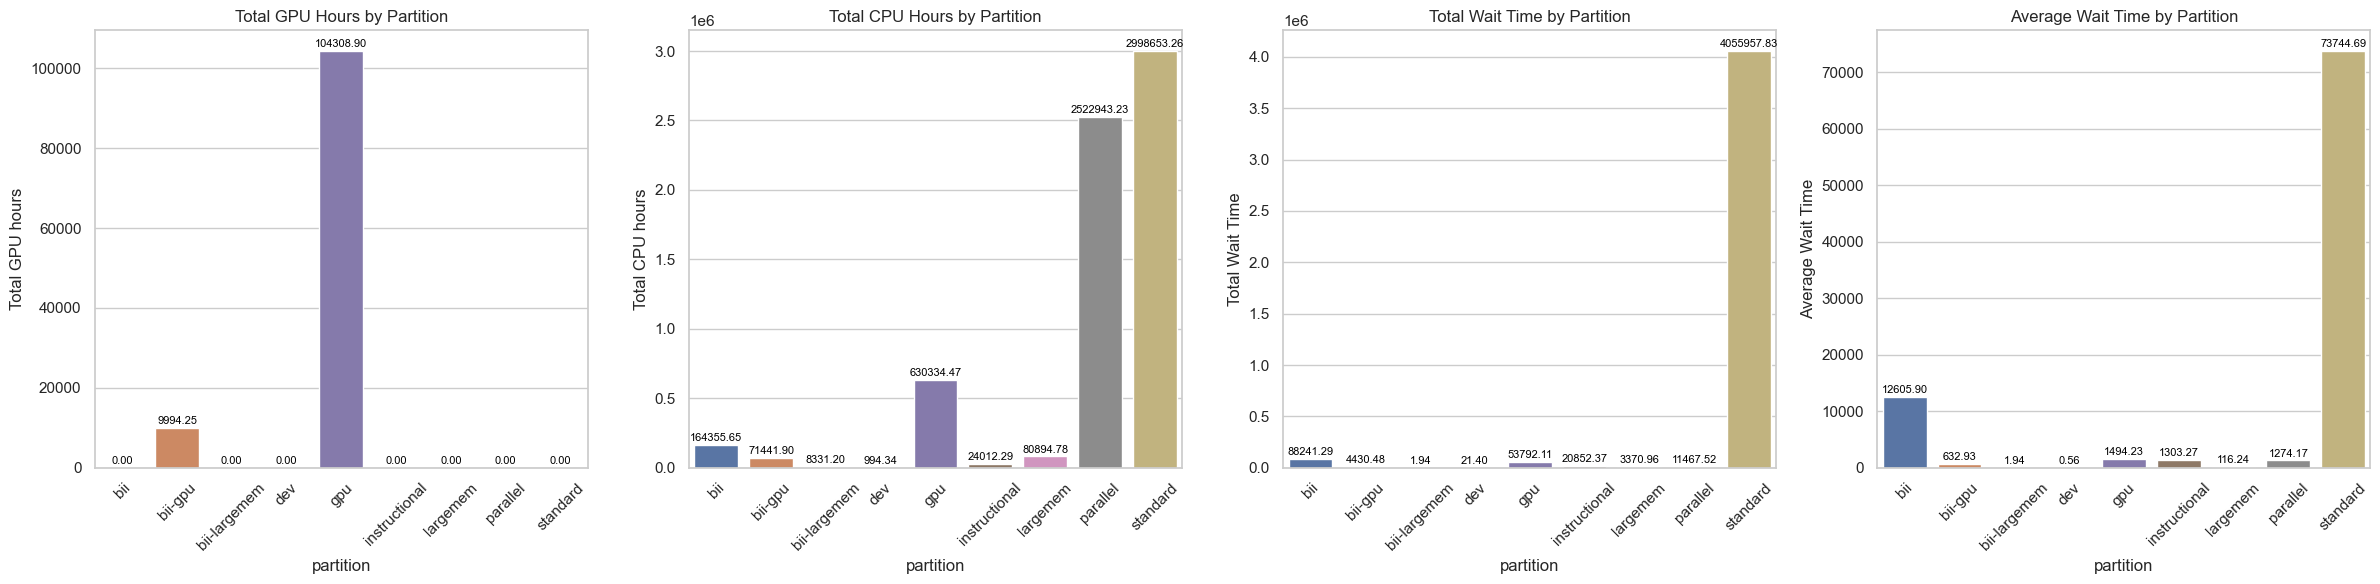

In [73]:
sns.set(style="whitegrid")


def bar_separate(data,key):
    fig, ax = plt.subplots(1, 4, figsize=(24, 6))  
    sns.barplot(x=key, y='Total GPU hours', data=data, ax=ax[0])
    ax[0].set_title(f'Total GPU Hours by {key.capitalize()}')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

    sns.barplot(x=key, y='Total CPU hours', data=data, ax=ax[1])
    ax[1].set_title(f'Total CPU Hours by {key.capitalize()}')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    sns.barplot(x=key, y='Total Wait Time hours', data=data, ax=ax[2])
    ax[2].set_title(f'Total Wait Time hours by {key.capitalize()}')
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

    sns.barplot(x=key, y='Average Wait Time hours', data=data, ax=ax[3])
    ax[3].set_title(f'Average Wait Time hours by {key.capitalize()}')
    ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)

    for p in ax[0].patches:
        ax[0].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    for p in ax[1].patches:
        ax[1].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    for p in ax[2].patches:
        ax[2].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    for p in ax[3].patches:
        ax[3].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

bar_separate(partition_agg,'partition')

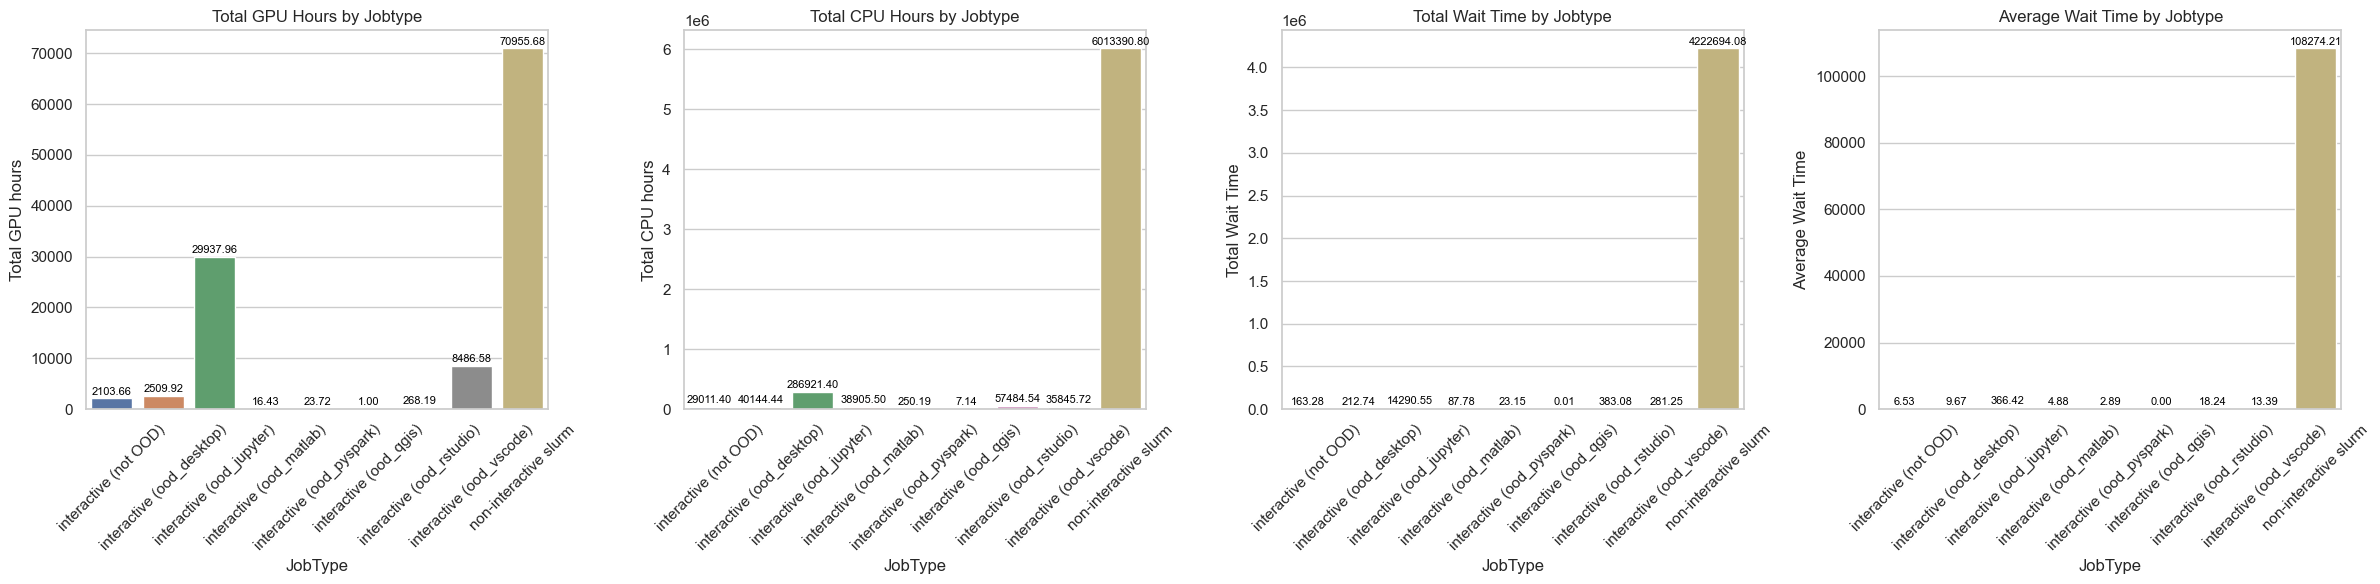

In [74]:
bar_separate(jobtype_agg,'JobType')

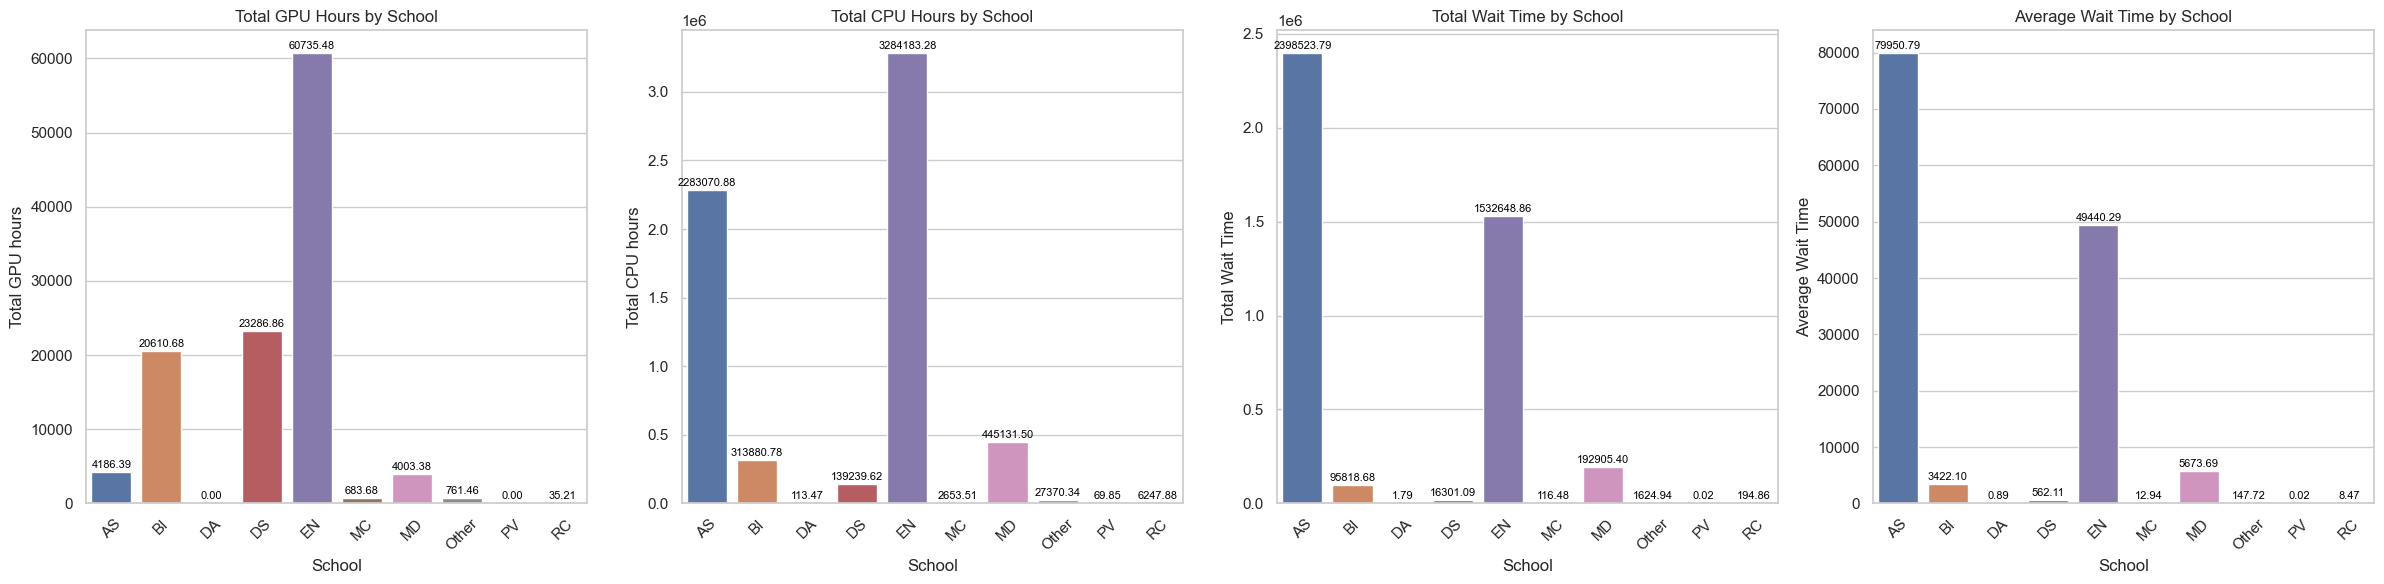

In [75]:
bar_separate(school_agg,'School')

### Pie Chart

In [76]:
def pie_plot(data,column,title,ax,ref):
    num_categories = len(data)
    percentages = data[column] / data[column].sum() * 100
    # print(percentages)
    explode = [0.2 if p < 1 else 0 for p in percentages]
    # print(explode)
    patches,texts,autotexts=ax.pie(data[column], labels=None, autopct='%1.1f%%', startangle=140,explode=explode,pctdistance=1.3)
    for text in texts:
        text.set_fontsize(8)
    
    for i, autotext in enumerate(autotexts):
        if percentages[i] < 0.2:
            autotext.set_text('')
        else:
            autotext.set_fontsize(10)
            autotext.set_color('black')
            autotext.set_weight('bold')

    ax.set_title(title)
    # plt.setp(autotexts, size=10, weight="bold")
    ax.legend(patches, data[ref], title=ref, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    

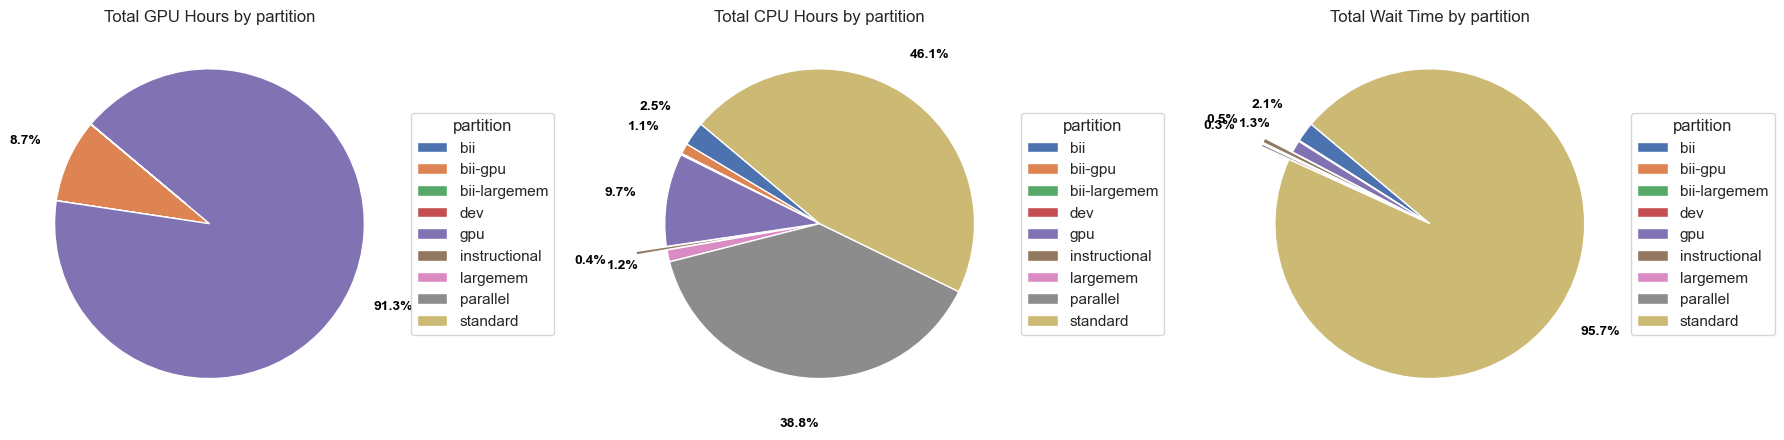

In [77]:
def pie_separate(data,key):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    pie_plot(data,'Total GPU hours','Total GPU Hours by '+key,ax[0],key)
    pie_plot(data,'Total CPU hours','Total CPU Hours by '+key,ax[1],key)
    pie_plot(data,'Total Wait Time hours','Total Wait Time hours by '+key,ax[2],key)

    plt.tight_layout()
    plt.show()

pie_separate(partition_agg,'partition')

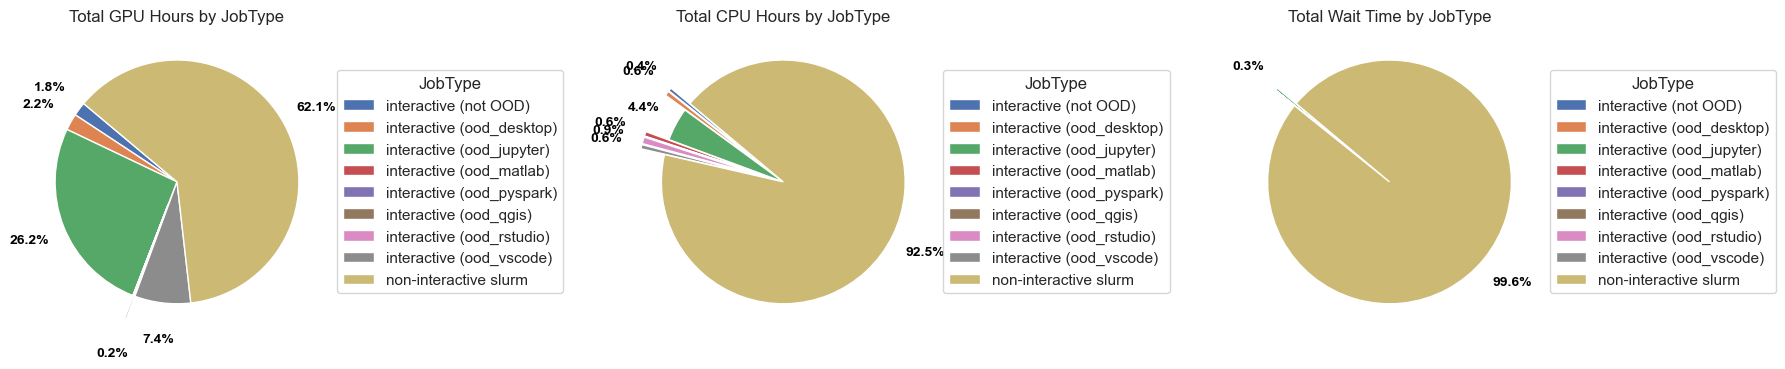

In [78]:
pie_separate(jobtype_agg,'JobType')

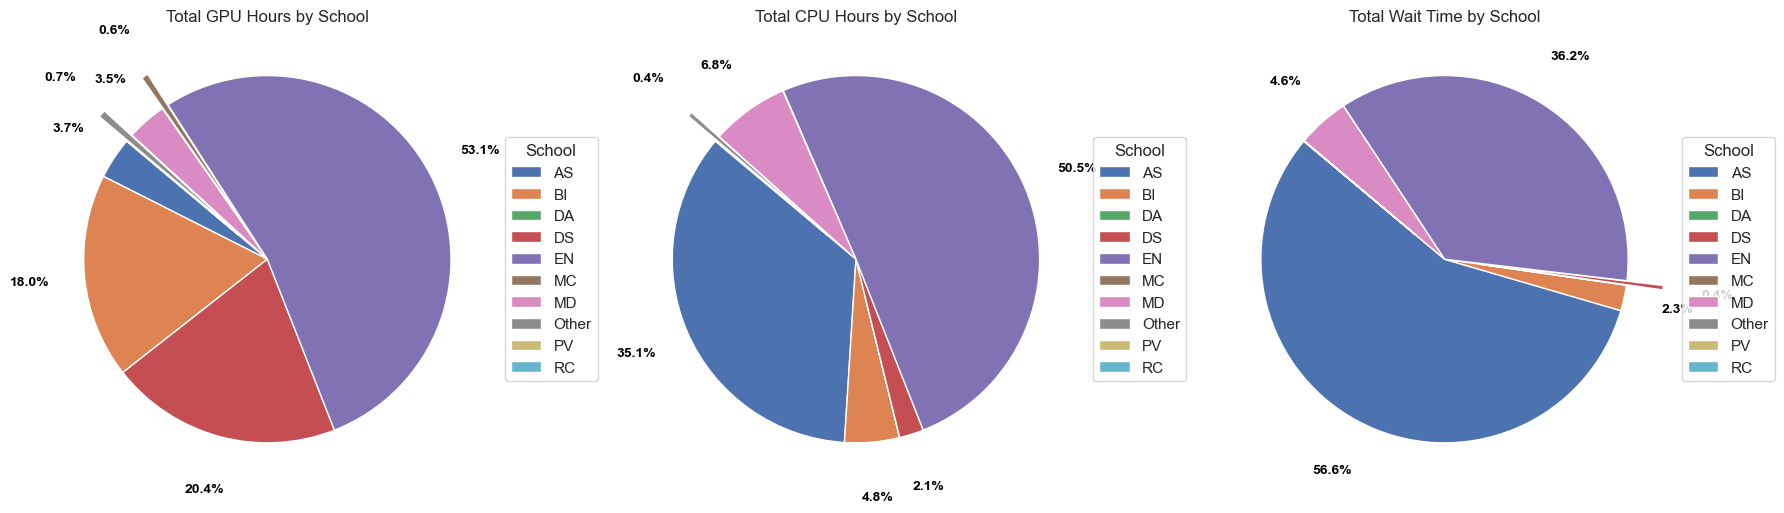

In [79]:
pie_separate(school_agg,'School')

### Bubble Chart

In [80]:
def bubble_plot(data,ax,x,y,s,proj):
    bubble=ax.scatter(data[x],data[y],s=data[s]*proj,c=data[s],cmap="viridis",alpha=0.5)
    cbar = plt.colorbar(bubble, label=s)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.show()


### Combine aggregation and plot
#### Partition with JobType

In [81]:
def aggregate2(key1,key2):
    agg=data.groupby([key1,key2]).agg({ 
            'Total CPU hours': 'sum',
            'Total GPU hours': 'sum',
            'Wait Time hours': ['sum', 'mean'],
        }).reset_index()
    agg.columns = [key1,key2, 'Total CPU hours', 'Total GPU hours', 'Total Wait Time hours', 'Average Wait Time hours']
    return agg
par_job_agg = aggregate2('partition', 'JobType')


output = widgets.Output()

with output:
    bubble_plot(par_job_agg,plt,"partition", "JobType", "Total GPU hours",0.5)
    bubble_plot(par_job_agg,plt,"partition", "JobType", "Total CPU hours",0.01)
    bubble_plot(par_job_agg,plt,"partition", "JobType", "Total Wait Time hours",0.01)
    bubble_plot(par_job_agg,plt,"partition", "JobType", "Average Wait Time hours",0.1)
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1000px', height='400px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

#### School with JobType

In [82]:
school_job_agg = aggregate2('School', 'JobType')

output = widgets.Output()

with output:
    bubble_plot(school_job_agg,plt,"School", "JobType", "Total GPU hours",0.5)
    bubble_plot(school_job_agg,plt,"School", "JobType", "Total CPU hours",0.01)
    bubble_plot(school_job_agg,plt,"School", "JobType", "Total Wait Time hours",0.01)
    bubble_plot(school_job_agg,plt,"School", "JobType", "Average Wait Time hours",0.1)
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1000px', height='400px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

### Relations among JobType School Partition

In [83]:
# from mpl_toolkits.mplot3d import Axes3D

# def plot_group_scatter(data,value):
#     data['partition_'] = data['partition'].astype('category').cat.codes
#     data['jobtype_'] = data['JobType'] .astype('category').cat.codes
#     data['school_'] = data['School'].astype('category').cat.codes
#     fig = plt.figure(figsize=(10, 7))
#     ax = fig.add_subplot(111, projection='3d')

#     sc = ax.scatter(
#         data['partition_'], data['jobtype_'], data['school_'],
#         c=data[value], cmap='viridis', marker='o',
#         vmin=data[value].min(), vmax=data[value].max()
#     )

#     cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
#     cb.set_label(value)


#     ax.set_xlabel('Partition')
#     ax.set_ylabel('JobType')
#     ax.set_zlabel('School')

#     ax.set_xticks(data['partition_'].unique())
#     ax.set_xticklabels(data['partition'].astype('category').cat.categories)

#     ax.set_yticks(data['jobtype_'].unique())
#     ax.set_yticklabels(data['JobType'].astype('category').cat.categories)

#     ax.set_zticks(data['school_'].unique())
#     ax.set_zticklabels(data['School'].astype('category').cat.categories)

#     plt.show()

# plot_group_scatter(data,'Total GPU hours')
# plot_group_scatter(data,'Total CPU hours')
# plot_group_scatter(data,'Wait Time hours')

In [84]:
# bubble visualization

In [85]:
# import numpy as np
# N=len(partition_agg)
# z= np.random.rand(N)
# cmap = plt.get_cmap('viridis')
# colors = cmap(z)


# scat=plt.scatter(partition_agg['Total CPU hours'], partition_agg['Total GPU hours'],s=partition_agg['Wait Time hours']*0.01,c=colors,alpha=0.5)
# # for i in range(partition_agg.shape[0]):
# #     plt.text(partition_agg['Total CPU hours'][i], partition_agg['Total GPU hours'][i], partition_agg['partition'][i], fontsize=10,rotation=-20)
# plt.xlabel('Total CPU Hours')
# plt.ylabel('Total GPU Hours')
# plt.title('Bubble Chart: Total GPU vs Total CPU Hours (Bubble Size = Wait Time hours)')

# import matplotlib.patches as mpatches
# legend_patches = [mpatches.Patch(color=colors[i], label=partition_agg['partition'][i]) for i in range(N)]
# plt.legend(handles=legend_patches, title='Partitions',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.tight_layout()
# plt.show()

In [86]:
# import numpy as np
# N=len(jobtype_agg)
# z= np.random.rand(N)
# cmap = plt.get_cmap('viridis')
# colors = cmap(z)


# scat=plt.scatter(jobtype_agg['Total CPU hours'], jobtype_agg['Total GPU hours'],s=jobtype_agg['Wait Time hours']*0.02,c=colors,alpha=0.5)
# # for i in range(partition_agg.shape[0]):
# #     plt.text(partition_agg['Total CPU hours'][i], partition_agg['Total GPU hours'][i], partition_agg['partition'][i], fontsize=10,rotation=-20)
# plt.xlabel('Total CPU Hours')
# plt.ylabel('Total GPU Hours')
# plt.title('Bubble Chart: Total GPU vs Total CPU Hours (Bubble Size = Wait Time hours)')

# legend_patches = [mpatches.Patch(color=colors[i], label=jobtype_agg['JobType'][i]) for i in range(N)]
# plt.legend(handles=legend_patches, title='JobType',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.tight_layout()
# plt.show()

In [87]:
# import numpy as np
# N=len(school_agg)
# z= np.random.rand(N)
# cmap = plt.get_cmap('viridis')
# colors = cmap(z)


# scat=plt.scatter(school_agg['Total CPU hours'], school_agg['Total GPU hours'],s=school_agg['Wait Time hours']*0.02,c=colors,alpha=0.5)
# # for i in range(partition_agg.shape[0]):
# #     plt.text(partition_agg['Total CPU hours'][i], partition_agg['Total GPU hours'][i], partition_agg['partition'][i], fontsize=10,rotation=-20)
# plt.xlabel('Total CPU Hours')
# plt.ylabel('Total GPU Hours')
# plt.title('Bubble Chart: Total GPU vs Total CPU Hours (Bubble Size = Wait Time hours)')

# legend_patches = [mpatches.Patch(color=colors[i], label=school_agg['School'][i]) for i in range(N)]
# plt.legend(handles=legend_patches, title='School',loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.tight_layout()
# plt.show()

In [88]:

# fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# ax[0].scatter(partition_agg['partition'], partition_agg['partition'],s=partition_agg['Total GPU hours']*0.01, alpha=0.5)
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
# ax[0].set_title('Total GPU Hours by Partition')

# ax[1].scatter(partition_agg['partition'], partition_agg['partition'],s=partition_agg['Total CPU hours']*0.01, alpha=0.5)
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
# ax[1].set_title('Total CPU Hours by Partition')

# ax[2].scatter(partition_agg['partition'], partition_agg['partition'],s=partition_agg['Wait Time hours']*0.01, alpha=0.5)
# ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
# ax[2].set_title('Wait Time hours by Partition')


# plt.show()

In [89]:

# fig, ax = plt.subplots(1, 3, figsize=(18, 6),sharey=True)
# ax[0].scatter(jobtype_agg['JobType'], jobtype_agg['JobType'],s=jobtype_agg['Total GPU hours']*0.01, alpha=0.5)
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
# ax[0].set_title('Total GPU Hours by JobType')

# ax[1].scatter(jobtype_agg['JobType'], jobtype_agg['JobType'],s=jobtype_agg['Total CPU hours']*0.01, alpha=0.5)
# ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
# ax[1].set_title('Total CPU Hours by JobType')

# ax[2].scatter(jobtype_agg['JobType'], jobtype_agg['JobType'],s=jobtype_agg['Wait Time hours']*0.01, alpha=0.5)
# ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
# ax[2].set_title('Wait Time hours by JobType')
# plt.show()

### Line Charts Over Time

In [36]:
def load_monthly_data(file_paths,months):
    data_frames=[]
    for file_path,month in zip(file_paths,months):
        df = pd.read_csv(file_path)
        df['Month']=month
        data_frames.append(df)
        combined_data = pd.concat(data_frames, ignore_index=True)
    return combined_data

In [91]:
file_paths = [
    '/project/rivanna-stats/all/2024-06/corehours-2024-06-SchoolpartitionJobType-all.csv',
    '/project/rivanna-stats/all/2024-05/corehours-2024-05-SchoolpartitionJobType-all.csv',
    '/project/rivanna-stats/all/2024-04/corehours-2024-04-SchoolpartitionJobType-all.csv',
    '/project/rivanna-stats/all/2024-03/corehours-2024-03-SchoolpartitionJobType-all.csv',
    '/project/rivanna-stats/all/2024-02/corehours-2024-02-SchoolpartitionJobType-all.csv',
    '/project/rivanna-stats/all/2024-01/corehours-2024-01-SchoolpartitionJobType-all.csv'
]##TODO change to the months you want to visualize

months = ['2024-06','2024-05','2024-04', '2024-03', '2024-02', '2024-01']#TODO change to the months you want to visualize

data_all=load_monthly_data(file_paths,months)
data_all.rename(columns={'Wait Time hours': 'Total Wait Time hours'}, inplace=True)

In [92]:
def plot_over_time(data,value,key,aggfunc):
    pivot=data.pivot_table(index='Month', columns=key, values=value, aggfunc=aggfunc).reset_index()
    fig, ax = plt.subplots(figsize=(8,6))
    for p in pivot.columns[1:]:
        ax.plot(pivot['Month'], pivot[p], marker='o', label=p)
    ax.legend(title=key, loc='upper left', bbox_to_anchor=(1, 1)) 
    ax.set_xlabel('Month')
    ax.set_ylabel(value)
    

    if aggfunc == 'mean' and value == 'Total Wait Time hours':
        title = f'Average Wait Time hours by {key} Over Time'
    else: title = f'{value} by {key} Over Time'
    ax.set_title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# average_wait_time = data_all.groupby('Month')['Wait Time hours'].mean().reset_index()
# average_wait_time.rename(columns={'Wait Time hours': 'Average Wait Time hours'}, inplace=True)


In [93]:
output = widgets.Output()

with output:
    plot_over_time(data_all,'Total GPU hours','partition','sum')
    plot_over_time(data_all,'Total CPU hours','partition','sum')
    plot_over_time(data_all,'Total Wait Time hours','partition','sum')
    plot_over_time(data_all,'Total Wait Time hours','partition','mean')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [94]:
output = widgets.Output()

with output:
    plot_over_time(data_all,'Total GPU hours','JobType','sum')
    plot_over_time(data_all,'Total CPU hours','JobType','sum')
    plot_over_time(data_all,'Total Wait Time hours','JobType','sum')
    plot_over_time(data_all,'Total Wait Time hours','JobType','mean')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [95]:
output = widgets.Output()

with output:
    plot_over_time(data_all,'Total GPU hours','School','sum')
    plot_over_time(data_all,'Total CPU hours','School','sum')
    plot_over_time(data_all,'Total Wait Time hours','School','sum')
    plot_over_time(data_all,'Total Wait Time hours','School','mean')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

### Bar Charts over Time

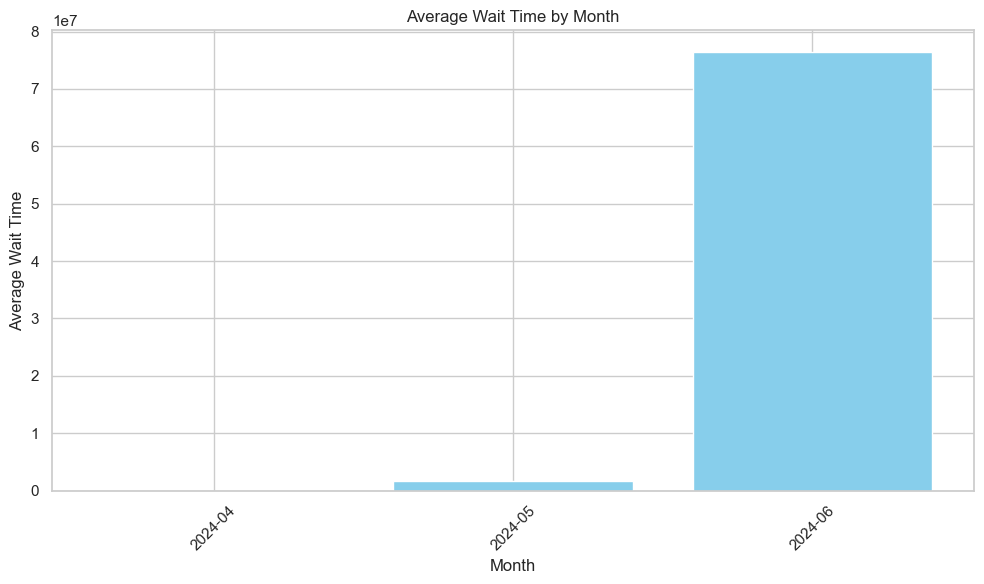

In [96]:
average_wait_time = data_all.groupby('Month')['Total Wait Time hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_wait_time['Month'], average_wait_time['Total Wait Time hours'], color='skyblue')

plt.xlabel('Month')
plt.ylabel('Average Wait Time hours')
plt.title('Average Wait Time hours by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
def plot_total_hours_over_time(data, value, title):
    total_hours = data.groupby('Month')[value].sum().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(total_hours['Month'], total_hours[value], color='skyblue')
    
    plt.xlabel('Month')
    plt.ylabel(value)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [98]:
output = widgets.Output()

with output:
    plot_total_hours_over_time(data_all, 'Total GPU hours', 'Total GPU Hours Over Time')
    plot_total_hours_over_time(data_all, 'Total CPU hours', 'Total CPU Hours Over Time')
    
scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

### Box Charts

In [99]:
def plot_box(data,key,value):
    plt.figure(figsize=(12, 6))
    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours')
    plt.title( value + ' by ' + key)
    plt.tight_layout()
    plt.show()

    
# plot_box(data_all,'partition','Total Wait Time hours')

In [100]:
files_and_titles = [
    ("/project/rivanna-stats/all/2024-06/corehours-2024-06-SchoolpartitionJobType-all.csv","2024-6"),
    ("/project/rivanna-stats/all/2024-05/corehours-2024-05-SchoolpartitionJobType-all.csv","2024-5"),
    ("/project/rivanna-stats/all/2024-04/corehours-2024-04-SchoolpartitionJobType-all.csv","2024-4"),
    ("/project/rivanna-stats/all/2024-03/corehours-2024-03-SchoolpartitionJobType-all.csv","2024-3"),
    ("/project/rivanna-stats/all/2024-02/corehours-2024-02-SchoolpartitionJobType-all.csv","2024-2"),
    ("/project/rivanna-stats/all/2024-01/corehours-2024-01-SchoolpartitionJobType-all.csv","2024-1")
] #TODO change to the month you want to visualize


In [101]:
from matplotlib.ticker import LogLocator, NullFormatter

def plot_box_log1(data,key,value):
    plt.figure(figsize=(12, 6))
    if data.equals(data_all):
        plt.title( value+' Hours'+ ' by ' + key+' for all months')
    else: plt.title( value+' Hours'+ ' by ' + key)
    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log scale)')
    plt.yscale('log')
    #plt.title( value + ' by ' + key)
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.tight_layout()
    plt.show()
    
def plot_box_log(data,key,value):
    plt.figure(figsize=(12, 6))
    if data.equals(data_all):
        plt.title( value+' Hours'+ ' by ' + key+' for all months')
    else: plt.title( value+' Hours'+ ' by ' + key)
    # data = data[pd.to_numeric(data[key], errors='coerce').notnull()]
    data[value+'+0.001'] = pd.to_numeric(data[value]) + 0.001
    box_plot = sns.boxplot(x=key, y=value+'+0.001', data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log + 1e-3  scale)')
    plt.yscale('log')
    
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.tight_layout()
    plt.show()

output = widgets.Output()
with output:    
    plot_box_log(data_all,'partition','Total Wait Time hours')
    plot_box_log1(data_all,'partition','Total Wait Time hours')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)


Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [102]:
output = widgets.Output()
with output:    
    plot_box_log(data_all,'JobType','Total Wait Time hours')
    plot_box_log1(data_all,'JobType','Total Wait Time hours')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)


Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [103]:
output = widgets.Output()
with output:    
    plot_box_log(data_all,'partition','Total Wait Time hours')
    plot_box_log1(data_all,'partition','Total Wait Time hours')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [104]:
def plot_box_title(data,key,value,title):
    plt.figure(figsize=(12, 6))
    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours')
    plt.title(title)
    plt.tight_layout()
    plt.show()

from matplotlib.ticker import LogLocator, NullFormatter

def plot_box_log1_title(data,key,value,title):
    plt.figure(figsize=(12, 6))
    

    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log scale)')
    plt.yscale('log')
    plt.title(title)
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.tight_layout()
    plt.show()
    
def plot_box_log_title(data,key,value,title):
    plt.figure(figsize=(12, 6))

    # data = data[pd.to_numeric(data[key], errors='coerce').notnull()]
    data[value+'+0.001'] = pd.to_numeric(data[value]) + 0.001
    box_plot = sns.boxplot(x=key, y=value+'+0.001', data=data, palette='Set3')
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log + 1e-3  scale)')
    plt.yscale('log')
    plt.title(title)
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.tight_layout()
    plt.show()
    

    
# plot_box(data_all,'partition','Total Wait Time hours')
output = widgets.Output()
with output:    
    for filename, month in files_and_titles:
        data = pd.read_csv(filename)
        plot_box_log_title(data, 'JobType', 'Wait Time hours', f'Wait Time hours by JobType for {month}')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)


Box(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1200x600 wi…

<Figure size 1200x600 with 0 Axes>

In [105]:
combined_data = pd.DataFrame()
for filename, month in files_and_titles:
    data = pd.read_csv(filename)
    data['Month'] = month
    combined_data = pd.concat([combined_data, data], ignore_index=True)
#combined_data

In [106]:

output = widgets.Output()
with output:    
    for filename, month in files_and_titles:
        plot_box_log_title(combined_data,'Month','Wait Time hours','Wait Time hours by Month')
        plot_box_log1_title(combined_data,'Month','Wait Time hours','Wait Time hours by Month')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [107]:
def plot_box_title_scatter(data,key,value,hue,title):
    plt.figure(figsize=(12, 6))
    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    scatter_plot = sns.stripplot(x=key, y=value, hue=hue, data=data, jitter=True, dodge=True, marker='o', alpha=0.7)
    plt.xlabel(key)
    plt.ylabel(value+' Hours')
    plt.title(title)
    plt.tight_layout()
    plt.legend(title=hue, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

from matplotlib.ticker import LogLocator, NullFormatter

def plot_box_log1_title_scatter(data,key,value,hue,title):
    plt.figure(figsize=(12, 6))
    

    box_plot = sns.boxplot(x=key, y=value, data=data, palette='Set3')
    scatter_plot = sns.stripplot(x=key, y=value, hue=hue, data=data, jitter=True, dodge=True, marker='o', alpha=0.7)
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log scale)')
    plt.yscale('log')
    plt.title(title)
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.legend(title=hue, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    
def plot_box_log_title_scatter(data,key,value,hue,title):
    plt.figure(figsize=(12, 6))

    # data = data[pd.to_numeric(data[key], errors='coerce').notnull()]
    data[value+'+0.001'] = pd.to_numeric(data[value]) + 0.001
    box_plot = sns.boxplot(x=key, y=value+'+0.001', data=data, palette='Set3')
    scatter_plot = sns.stripplot(x=key, y=value, hue=hue, data=data, jitter=True, dodge=True, marker='o', alpha=0.7)
    
    plt.xlabel(key)
    plt.ylabel(value+' Hours'+' (log + 1e-3  scale)')
    plt.yscale('log')
    plt.title(title)
    # data['Wait Time hours'] = data['Wait Time hours'].replace(0, 1e-6)
    ax = plt.gca()
    if key == 'JobType':
        plt.xticks(rotation=45)
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=20))
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.legend(title=hue, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    

In [108]:
average_wait_time_m_j = combined_data.groupby(['Month', 'JobType'])['Wait Time hours'].mean().reset_index()
average_wait_time_m_j.rename(columns={'Wait Time hours': 'Average Wait Time hours'}, inplace=True)

In [109]:
output = widgets.Output()
with output: 
    plot_box_log1_title(average_wait_time_m_j,'Month','Average Wait Time hours','Average Wait Time hours by JobType for Each Month')
    plot_box_log1_title(average_wait_time_m_j,'JobType','Average Wait Time hours','Average Wait Time hours by Month for Each Jobtype')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [110]:
# plot_box_log1_title_scatter(average_wait_time_m_j,'Month','Average Wait Time hours','JobType','Average Wait Time hours by JobType for Each Month')
# plot_box_log1_title_scatter(average_wait_time_m_j,'JobType','Average Wait Time hours','Month','Average Wait Time hours by Month for Each Jobtype')
output = widgets.Output()
with output: 
    plot_box_log1_title_scatter(average_wait_time_m_j,'Month','Average Wait Time hours','JobType','Average Wait Time hours by JobType for Each Month')
    plot_box_log1_title_scatter(average_wait_time_m_j,'JobType','Average Wait Time hours','Month','Average Wait Time hours by Month for Each Jobtype')
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [111]:
# plt.figure(figsize=(14, 8))
# sns.boxplot(x='JobType', y='Average Wait Time hours', data=average_wait_time_m_j, palette='Set3')
# sns.stripplot(x='JobType', y='Average Wait Time hours', hue='Month', data=average_wait_time_m_j, jitter=True, dodge=True, marker='o', alpha=0.7)

# plt.xlabel('JobType')
# plt.ylabel('Average Wait Time hours')
# plt.title('Average Wait Time hours by JobType for Each Month')
# plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### GPU VS CPU 

In [112]:
from matplotlib.ticker import FuncFormatter
def scatter_plot_log(data,x,y,hue,title):
    
    data[x+'+0.001'] = pd.to_numeric(data[x]) + 0.001
    data[y+'+0.001'] = pd.to_numeric(data[y]) + 0.001
    
    scatter = sns.scatterplot(
        data=data, x=x+'+0.001', y=y+'+0.001', hue=hue, palette='tab10', s=20, alpha=0.7
    )
    
    plt.plot([10**-3,10**7], 
             [10**-3,10**7], 
             linestyle='--', color='gray', alpha=0.5)
    print(data.shape)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.yscale('log')
    plt.xscale('log')
    plt.xticks([10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7])
    plt.yticks([10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7])
    plt.legend(title=hue, loc='upper left', bbox_to_anchor=(1, 1)) 
    plt.title(title)
#     def format_func(value, tick_number):
#         if value == 0.001:
#             return '0'
#         else:
#             return '${:.0f} \\times 10^{{{}}}$'.format(value / 10**3, 3)

    
#     plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
#     plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
    plt.show()
    

In [113]:
data.size

1176

In [114]:
output = widgets.Output()
with output:    
    for filename, month in files_and_titles:
        data = pd.read_csv(filename)
        scatter_plot_log(data, 'Total CPU hours', 'Total GPU hours', 'School', month)
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)


Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [115]:
output = widgets.Output()
with output:    
    for filename, month in files_and_titles:
        data = pd.read_csv(filename)
        scatter_plot_log(data, 'Total CPU hours', 'Total GPU hours', 'partition', month)
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [116]:
output = widgets.Output()
with output:    
    for filename, month in files_and_titles:
        data = pd.read_csv(filename)
        scatter_plot_log(data, 'Total CPU hours', 'Total GPU hours', 'JobType', month)
    scrollable_box = widgets.Box([output], layout=widgets.Layout(overflow='scroll', border='1px solid black', width='1200px', height='500px', flex_direction='column', display='block'))
display(scrollable_box)

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

### Stack Graph

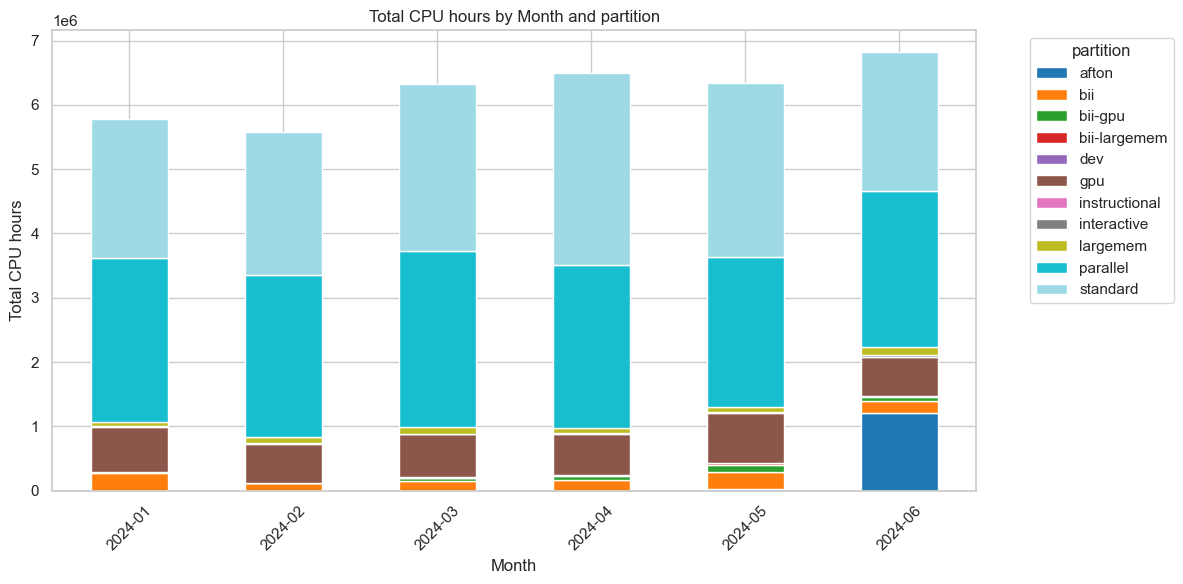

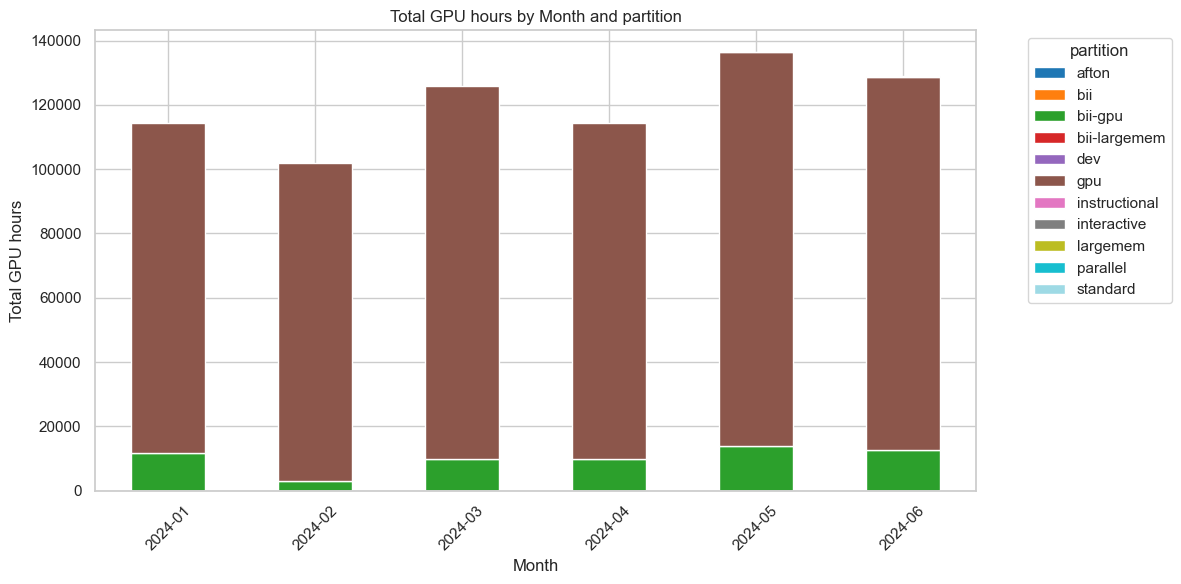

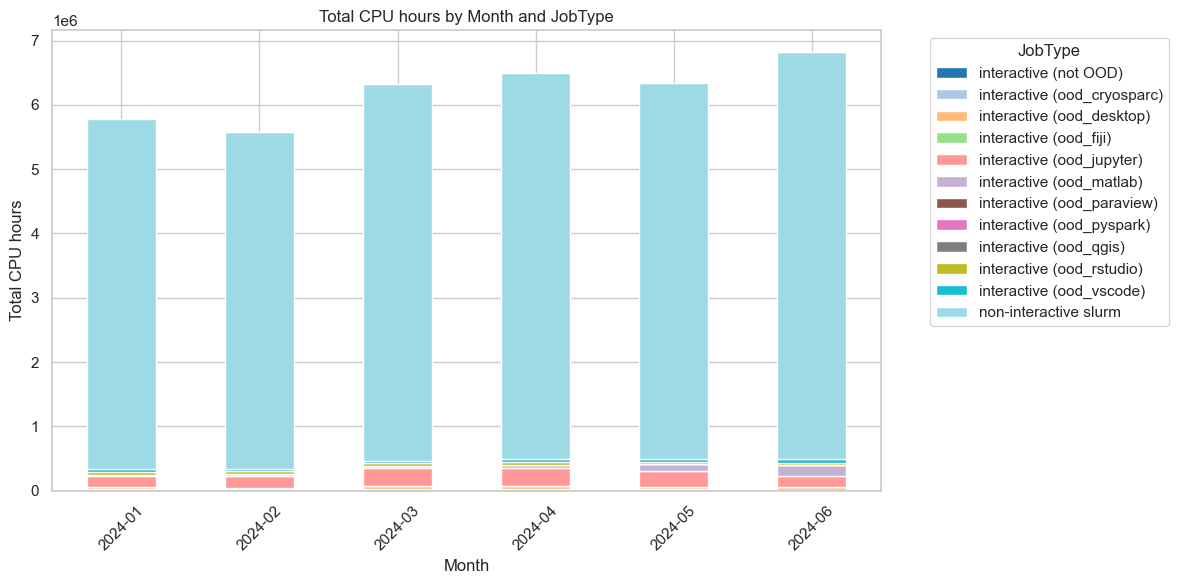

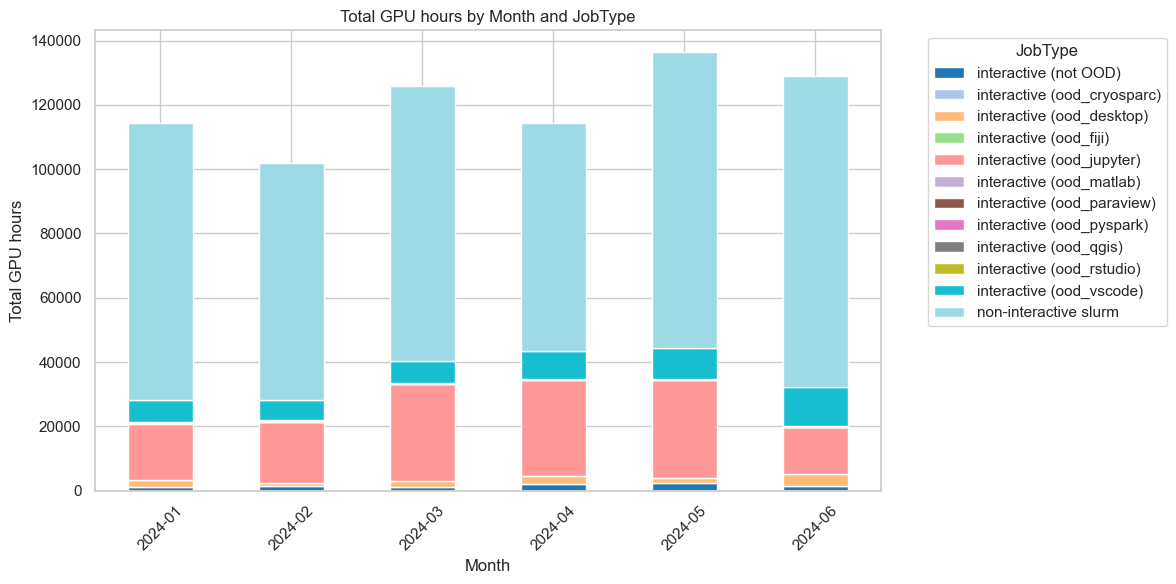

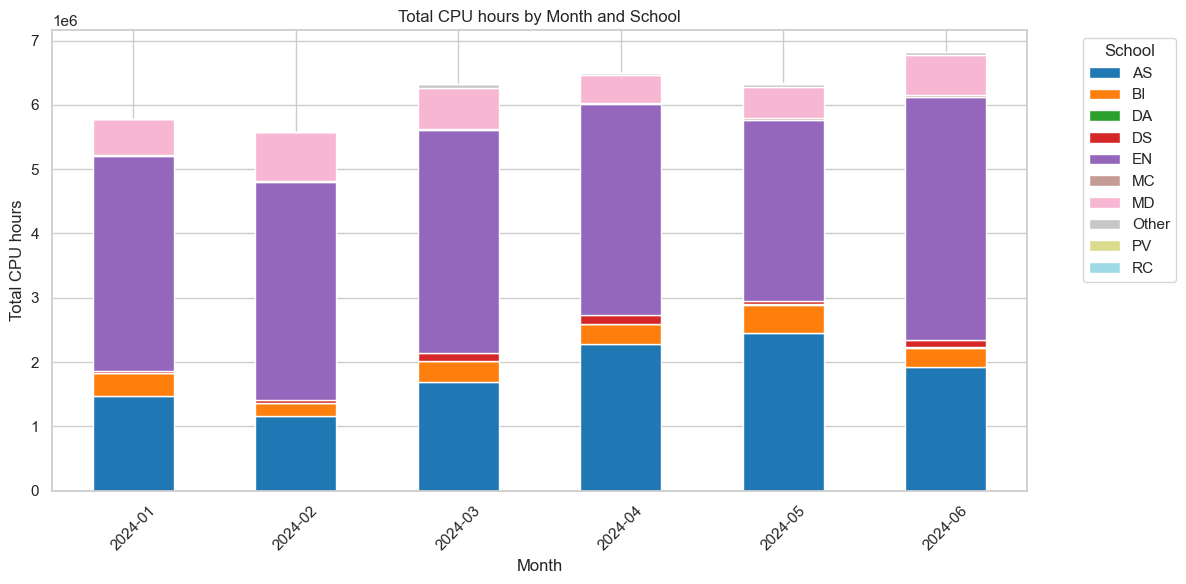

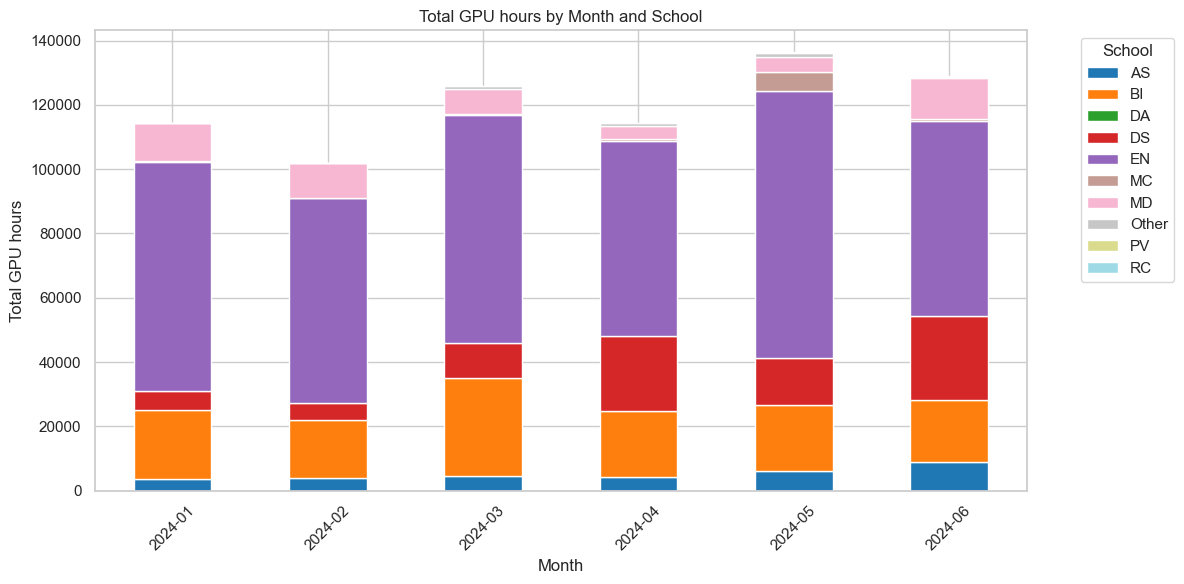

In [117]:
def plot_stacked_bar(data,x,y,hue):
    # Pivot the data for stacking
    pivot_table = data.pivot_table(index=x, columns=hue, values=y, aggfunc='sum').fillna(0)
    
    # Plotting
    pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} by {x} and {hue}')
    plt.xticks(rotation=45)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_stacked_bar(data_all, 'Month', 'Total CPU hours', 'partition')
plot_stacked_bar(data_all, 'Month', 'Total GPU hours', 'partition')
plot_stacked_bar(data_all, 'Month', 'Total CPU hours', 'JobType')
plot_stacked_bar(data_all, 'Month', 'Total GPU hours', 'JobType')
plot_stacked_bar(data_all, 'Month', 'Total CPU hours', 'School')
plot_stacked_bar(data_all, 'Month', 'Total GPU hours', 'School')

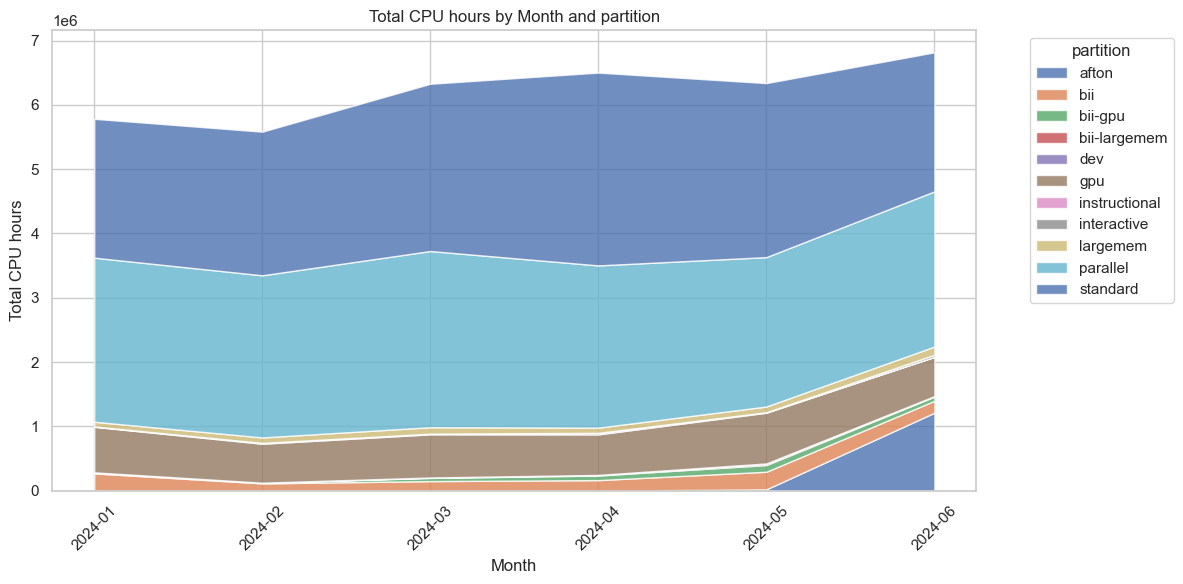

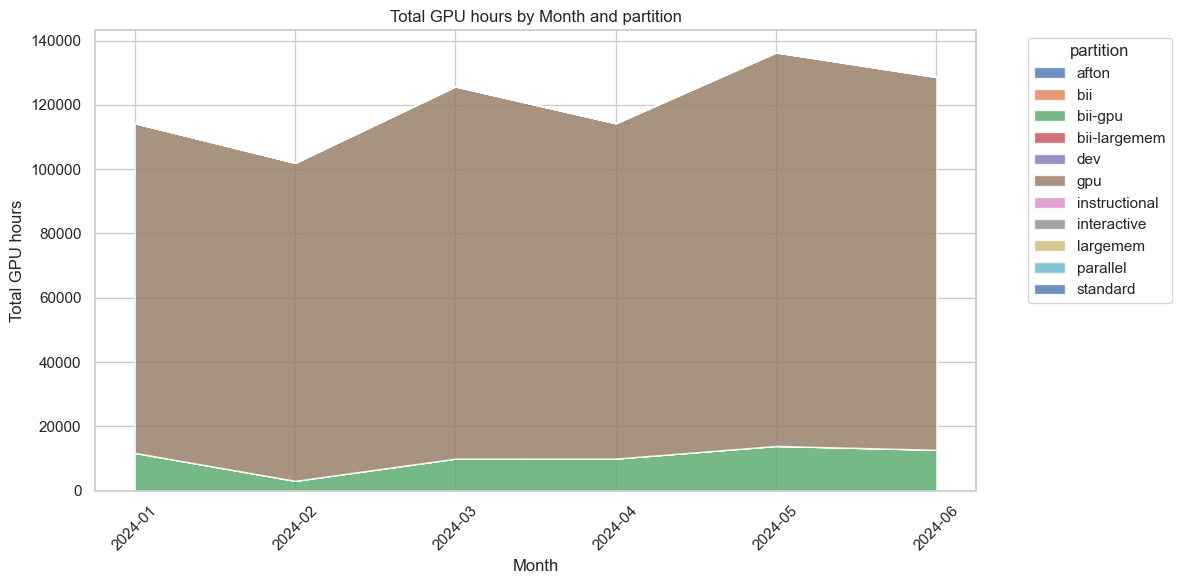

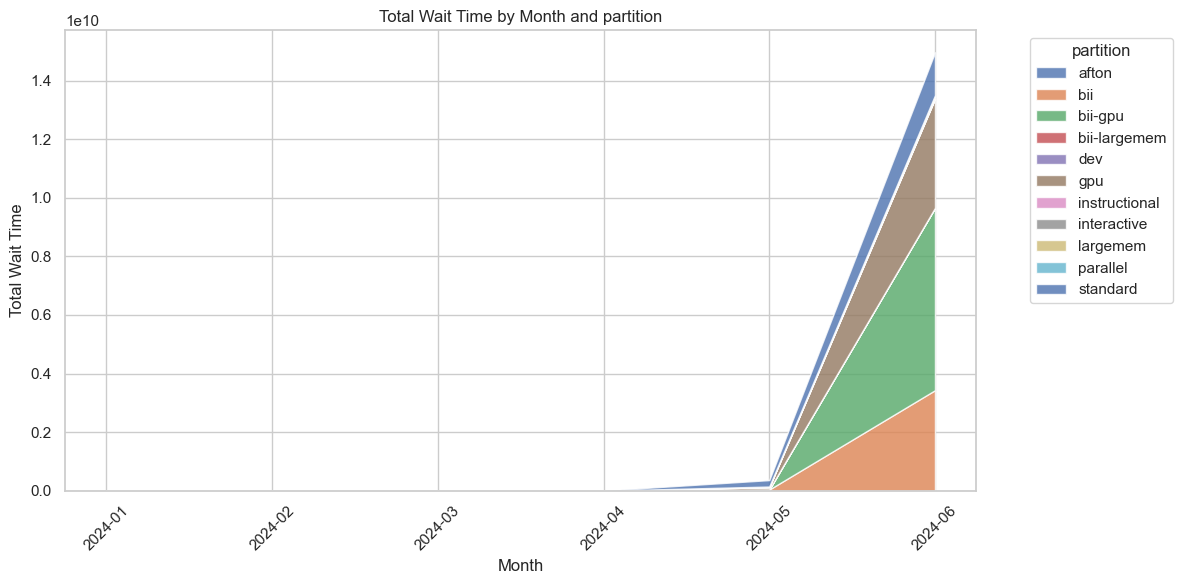

In [118]:
def plot_stacked_area(data, x, y, hue):
    # Pivot the data for stacking
    pivot_table = data.pivot_table(index=x, columns=hue, values=y, aggfunc='sum').fillna(0)
    
    # Prepare data for stackplot
    months = pivot_table.index
    values = [pivot_table[col].values for col in pivot_table.columns]
    labels = pivot_table.columns
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.stackplot(months, values, labels=labels, alpha=0.8)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} by {x} and {hue}')
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_stacked_area(data_all, 'Month', 'Total CPU hours', 'partition')
plot_stacked_area(data_all, 'Month', 'Total GPU hours', 'partition')
plot_stacked_area(data_all, 'Month', 'Total Wait Time hours', 'partition')

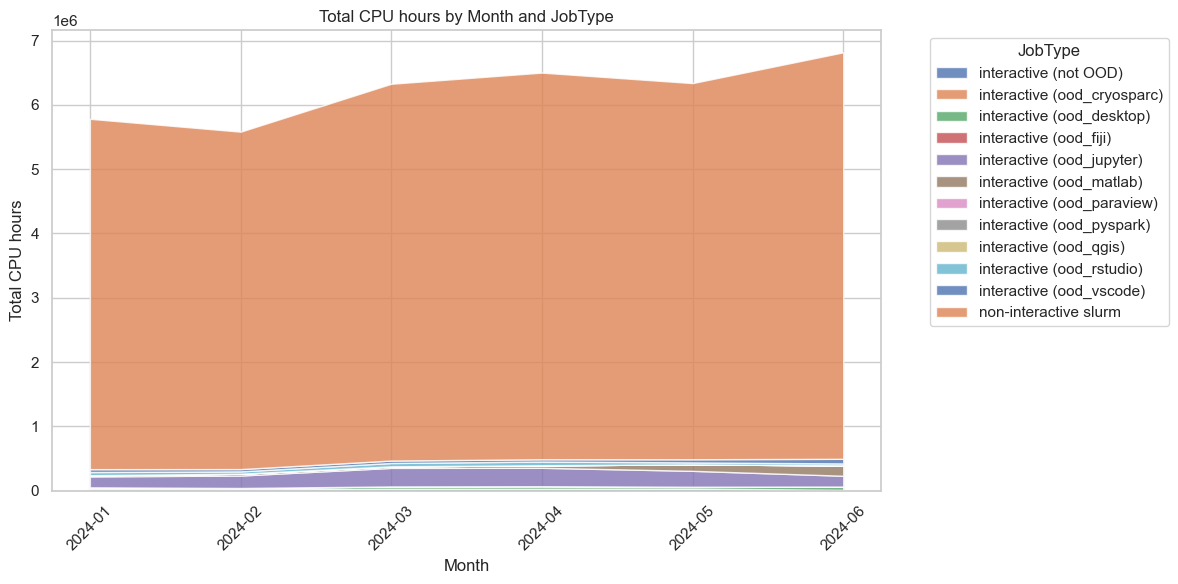

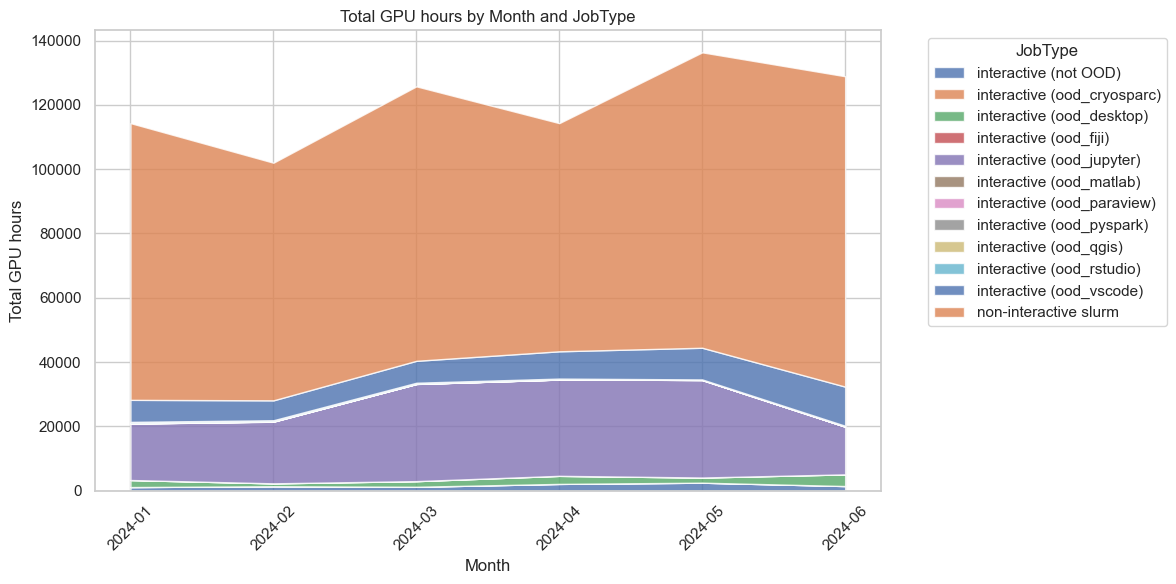

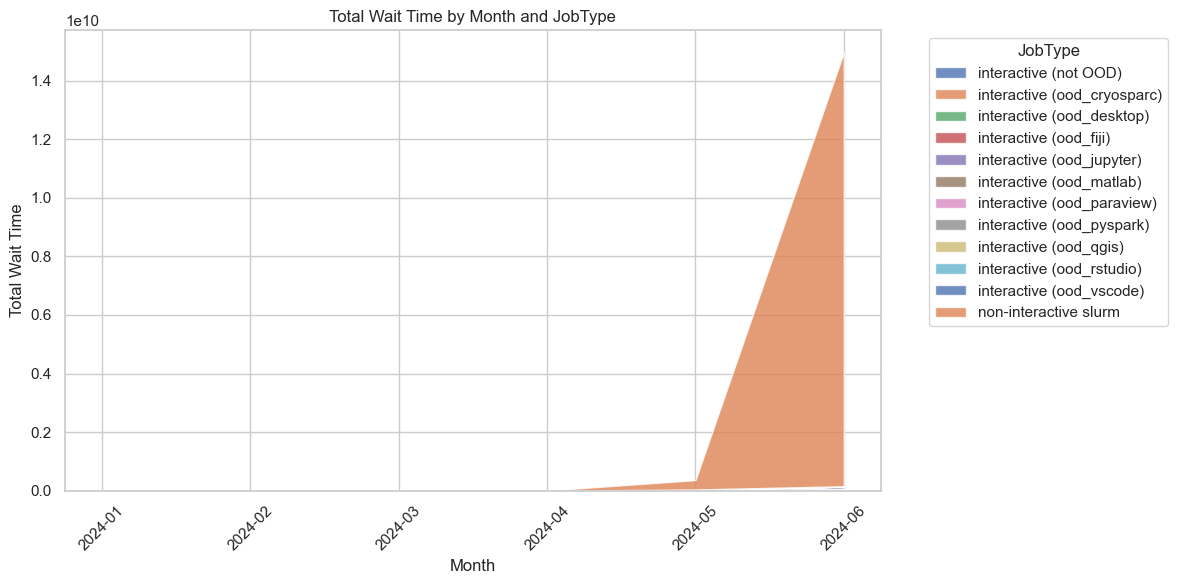

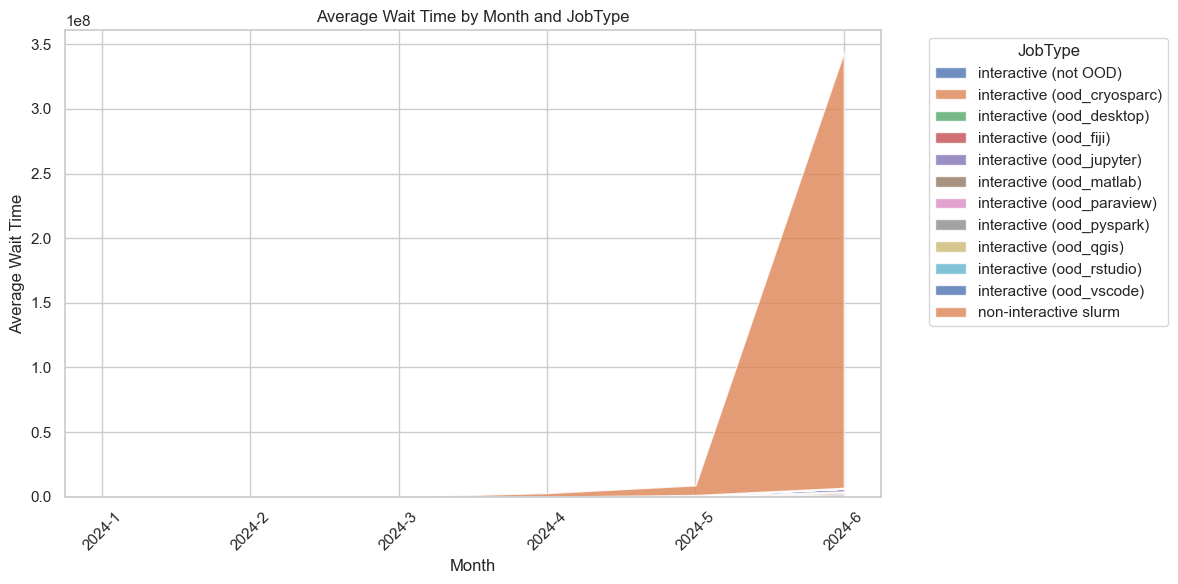

In [119]:
plot_stacked_area(data_all, 'Month', 'Total CPU hours', 'JobType')
plot_stacked_area(data_all, 'Month', 'Total GPU hours', 'JobType')
plot_stacked_area(data_all, 'Month', 'Total Wait Time hours', 'JobType')
plot_stacked_area(average_wait_time_m_j, 'Month', 'Average Wait Time hours', 'JobType')